In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score

# Carga de datos desde resultado Consulta_regalias.ipynb

In [3]:
Regalias = pd.read_excel('Regalias_proyectos_red_2norm.xlsx', index_col=0)

Regalias

,BPIN,Estado,Plazo programado (meses),Desempeño en el costo (EV/AC),Resultado Desempeño en el Costo,Valor SGR,valor total,Costo Actual (AC),Código ejecutor,% Ejecución de metas de producto,...,Empresa Social del Estado,Empresa de Servicios Públicos,G1- Nivel Alto,G2- Nivel Medio Alto,G3- Nivel Medio,G4- Nivel Medio Bajo,G5- Nivel Bajo,Institución De Educación Superior,Institución de Educación Superior,Otros.1
0,-0.172124,1,2.144472,-0.00608,0.493215,3.070884,0.364055,2.544896,-0.326121,-0.006099,...,0,0,0,0,0,0,0,0,0,0
1,-0.171460,1,0.362670,-0.00608,0.493215,4.678105,0.492879,3.319865,-0.326121,-0.006099,...,0,0,0,0,0,0,0,0,0,0
2,-0.171459,1,4.007264,-0.00608,0.493215,0.843804,0.069432,0.632226,-0.326121,-0.006099,...,0,0,0,0,0,0,0,0,0,0
3,-0.171128,1,0.605643,-0.00608,-2.036248,1.891054,0.183761,1.003583,-0.326121,-0.006099,...,0,0,0,0,0,0,0,0,0,0
4,-0.171128,1,1.496544,-0.00608,0.493215,2.496174,0.296992,1.886841,-0.326121,-0.006099,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27319,-0.169135,0,-0.933185,-0.00608,-2.036248,-0.258023,-0.050856,-0.392196,3.082730,-0.006100,...,0,0,0,0,0,0,0,0,0,0
27320,-0.169910,1,-0.204266,-0.00608,0.493215,-0.152023,-0.039284,-0.161285,3.082648,-0.006099,...,0,0,0,0,0,0,0,0,0,0
27321,-0.169653,1,-0.366248,-0.00608,0.493215,-0.358123,-0.061784,-0.325433,3.082652,-0.006099,...,0,0,0,0,0,0,0,0,0,0
27322,-0.169798,1,-0.285257,-0.00608,0.493215,-0.392214,-0.065506,-0.352610,3.082627,-0.006099,...,0,0,0,0,0,0,0,0,0,1


In [4]:
Regalias = Regalias[[col for col in Regalias.columns if col != 'Estado'] + ['Estado']]
Regalias

,BPIN,Plazo programado (meses),Desempeño en el costo (EV/AC),Resultado Desempeño en el Costo,Valor SGR,valor total,Costo Actual (AC),Código ejecutor,% Ejecución de metas de producto,Variación del tiempo (retraso / t programado),...,Empresa de Servicios Públicos,G1- Nivel Alto,G2- Nivel Medio Alto,G3- Nivel Medio,G4- Nivel Medio Bajo,G5- Nivel Bajo,Institución De Educación Superior,Institución de Educación Superior,Otros.1,Estado
0,-0.172124,2.144472,-0.00608,0.493215,3.070884,0.364055,2.544896,-0.326121,-0.006099,-0.130074,...,0,0,0,0,0,0,0,0,0,1
1,-0.171460,0.362670,-0.00608,0.493215,4.678105,0.492879,3.319865,-0.326121,-0.006099,-0.130074,...,0,0,0,0,0,0,0,0,0,1
2,-0.171459,4.007264,-0.00608,0.493215,0.843804,0.069432,0.632226,-0.326121,-0.006099,-0.130074,...,0,0,0,0,0,0,0,0,0,1
3,-0.171128,0.605643,-0.00608,-2.036248,1.891054,0.183761,1.003583,-0.326121,-0.006099,-0.130074,...,0,0,0,0,0,0,0,0,0,1
4,-0.171128,1.496544,-0.00608,0.493215,2.496174,0.296992,1.886841,-0.326121,-0.006099,-0.106474,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27319,-0.169135,-0.933185,-0.00608,-2.036248,-0.258023,-0.050856,-0.392196,3.082730,-0.006100,-0.130074,...,0,0,0,0,0,0,0,0,0,0
27320,-0.169910,-0.204266,-0.00608,0.493215,-0.152023,-0.039284,-0.161285,3.082648,-0.006099,-0.130074,...,0,0,0,0,0,0,0,0,0,1
27321,-0.169653,-0.366248,-0.00608,0.493215,-0.358123,-0.061784,-0.325433,3.082652,-0.006099,-0.130074,...,0,0,0,0,0,0,0,0,0,1
27322,-0.169798,-0.285257,-0.00608,0.493215,-0.392214,-0.065506,-0.352610,3.082627,-0.006099,-0.669913,...,0,0,0,0,0,0,0,0,1,1


In [5]:
Regalias.columns

Index(['BPIN', 'Plazo programado (meses)', 'Desempeño en el costo (EV/AC)',
       'Resultado Desempeño en el Costo', 'Valor SGR', 'valor total',
       'Costo Actual (AC)', 'Código ejecutor',
       '% Ejecución de metas de producto',
       'Variación del tiempo (retraso / t programado)',
       ...
       'Empresa de Servicios Públicos', 'G1- Nivel Alto',
       'G2- Nivel Medio Alto', 'G3- Nivel Medio', 'G4- Nivel Medio Bajo',
       'G5- Nivel Bajo', 'Institución De Educación Superior',
       'Institución de Educación Superior', 'Otros.1', 'Estado'],
      dtype='object', length=101)

In [6]:
X = Regalias[[col for col in Regalias.columns if col != 'Estado']]
Y = Regalias['Estado']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, stratify=Y)

In [7]:
y_test.value_counts()

1    6727
0      36
Name: Estado, dtype: int64

Recordar que el diccionario de datos en la clasificación para 'Estado' es 

{'4. Desaprobado': 0, '3. Terminado': 1}

# Naive-Bayes

In [8]:
RegNB = GaussianNB().fit(X_train, y_train)
y_predNB = RegNB.predict(X_test)
conf_mNB = confusion_matrix(y_test, y_predNB)
print('Regalías por Naive-Bayes')
print('Datos de entrenamiento: {:.2f}'
     .format(RegNB.score(X_train, y_train)))
print('Datos de prueba: {:.2f}'
     .format(RegNB.score(X_test, y_test)))
print("Matriz de confusión NB \n", conf_mNB)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predNB)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predNB)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predNB)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predNB)))
print('ROC auc: ', roc_auc_score(y_test, y_predNB))

Regalías por Naive-Bayes
Datos de entrenamiento: 0.01
Datos de prueba: 0.01
Matriz de confusión NB 
 [[  36    0]
 [6689   38]]
Accuracy: 0.01
Precision: 1.00
Recall: 0.01
F1: 0.01
ROC auc:  0.5028244388286012


# Regresión logística

In [9]:
RegRL = LogisticRegression().fit(X_train, y_train)
y_predRL = RegRL.predict(X_test)
conf_mRL = confusion_matrix(y_test, y_predRL)
print('Regalías por regresión logística')
print('Datos de entrenamiento: {:.2f}'
     .format(RegRL.score(X_train, y_train)))
print('Datos de prueba: {:.2f}'
     .format(RegRL.score(X_test, y_test)))
print("Matriz de confusión RL \n", conf_mRL)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRL)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRL)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRL)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRL)))
print('ROC auc: ', roc_auc_score(y_test, y_predRL))

Regalías por regresión logística
Datos de entrenamiento: 0.01
Datos de prueba: 0.01
Matriz de confusión RL 
 [[  36    0]
 [6727    0]]
Accuracy: 0.01
Precision: 0.00
Recall: 0.00
F1: 0.00
ROC auc:  0.5


C:\Users\angry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\angry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Árbol de decisión

In [10]:
RegAD = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
y_predAD = RegAD.predict(X_test)
conf_mAD = confusion_matrix(y_test, y_predAD)
print('Regalías por árbol de decisión')
print('Datos de entrenamiento: {:.2f}'
     .format(RegAD.score(X_train, y_train)))
print('Datos de prueba: {:.2f}'
     .format(RegAD.score(X_test, y_test)))
print("Matriz de confusión AD \n", conf_mAD)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predAD)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predAD)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predAD)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predAD)))
print('ROC auc: ', roc_auc_score(y_test, y_predAD))

Regalías por árbol de decisión
Datos de entrenamiento: 1.00
Datos de prueba: 1.00
Matriz de confusión AD 
 [[  36    0]
 [   0 6727]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROC auc:  1.0


# Vecinos más cercanos

In [11]:
RegVC = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_predVC = RegVC.predict(X_test)
conf_mVC = confusion_matrix(y_test, y_predVC)
print('Regalías por vecinos más cercanos')
print('Datos de entrenamiento: {:.2f}'
     .format(RegVC.score(X_train, y_train)))
print('Datos de prueba: {:.2f}'
     .format(RegVC.score(X_test, y_test)))
print("Matriz de confusión VC \n", conf_mVC)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predVC)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predVC)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predVC)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predVC)))
print('ROC auc: ', roc_auc_score(y_test, y_predVC))

Regalías por vecinos más cercanos
Datos de entrenamiento: 1.00
Datos de prueba: 1.00
Matriz de confusión VC 
 [[  36    0]
 [   0 6727]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROC auc:  1.0


# Máquina de Soporte Vectorial

In [12]:
RegMSV = SVC(kernel='rbf', C=1).fit(X_train, y_train)
y_predMSV = RegMSV.predict(X_test)
conf_mMSV = confusion_matrix(y_test, y_predMSV)
print('Regalías por máquina de soporte vectorial')
print('Datos de entrenamiento: {:.2f}'
     .format(RegMSV.score(X_train, y_train)))
print('Datos de prueba: {:.2f}'
     .format(RegMSV.score(X_test, y_test)))
print("Matriz de confusión MSV \n", conf_mMSV)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predMSV)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predMSV)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predMSV)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predMSV)))
print('ROC auc: ', roc_auc_score(y_test, y_predMSV))

Regalías por máquina de soporte vectorial
Datos de entrenamiento: 0.99
Datos de prueba: 0.99
Matriz de confusión MSV 
 [[   0   36]
 [   0 6727]]
Accuracy: 0.99
Precision: 0.99
Recall: 1.00
F1: 1.00
ROC auc:  0.5


In [13]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 



# 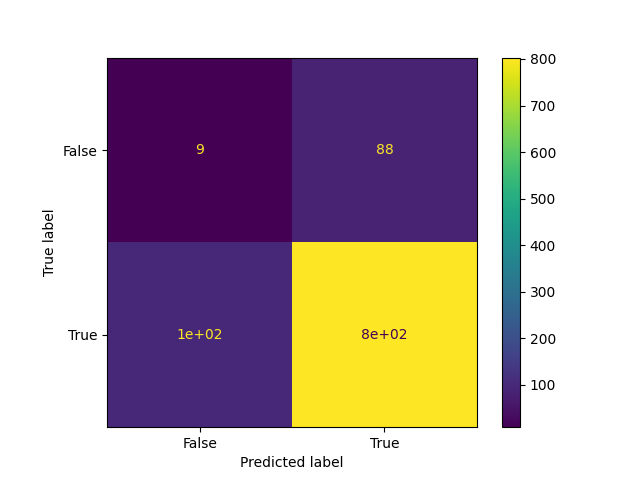

# Oversampling de datos

Hay muchos datos asociados al estado 0 (terminado)

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
from collections import Counter

# summarize class distribution
print("Antes del oversampling: ",Counter(y_train))

SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("Después del oversampling: ",Counter(y_train_SMOTE))

Antes del oversampling:  Counter({1: 20180, 0: 108})
Después del oversampling:  Counter({1: 20180, 0: 20180})


Se van a tomar los modelos con mejores resultados: árbol de decisión (con profundidad 4) y vecinos más cercanos (con k=3)

# Naive-Bayes con oversampling

In [16]:
RegNB_SMOTE = GaussianNB().fit(X_train, y_train).fit(X_train_SMOTE, y_train_SMOTE)
y_predNB_SMOTE = RegNB_SMOTE.predict(X_test)
conf_mNB_SMOTE = confusion_matrix(y_test, y_predNB_SMOTE)
print('Regalías por Naive-Bayes')
print('Datos de entrenamiento: {:.2f}'
     .format(RegNB_SMOTE.score(X_train_SMOTE, y_train_SMOTE)))
print('Datos de prueba: {:.2f}'
     .format(RegNB_SMOTE.score(X_test, y_test)))
print("Matriz de confusión AD \n", conf_mNB_SMOTE)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predNB_SMOTE)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predNB_SMOTE)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predNB_SMOTE)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predNB_SMOTE)))
print('ROC auc: ', roc_auc_score(y_test, y_predNB_SMOTE))

Regalías por Naive-Bayes
Datos de entrenamiento: 0.50
Datos de prueba: 0.01
Matriz de confusión AD 
 [[  36    0]
 [6689   38]]
Accuracy: 0.01
Precision: 1.00
Recall: 0.01
F1: 0.01
ROC auc:  0.5028244388286012


# Regresión logística con oversampling

In [17]:
RegRL_SMOTE = LogisticRegression().fit(X_train, y_train).fit(X_train_SMOTE, y_train_SMOTE)
y_predRL_SMOTE = RegRL_SMOTE.predict(X_test)
conf_mRL_SMOTE = confusion_matrix(y_test, y_predRL_SMOTE)
print('Regalías por Regresión Logística')
print('Datos de entrenamiento: {:.2f}'
     .format(RegRL_SMOTE.score(X_train_SMOTE, y_train_SMOTE)))
print('Datos de prueba: {:.2f}'
     .format(RegRL_SMOTE.score(X_test, y_test)))
print("Matriz de confusión AD \n", conf_mRL_SMOTE)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRL_SMOTE)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRL_SMOTE)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRL_SMOTE)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRL_SMOTE)))
print('ROC auc: ', roc_auc_score(y_test, y_predNB_SMOTE))

C:\Users\angry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regalías por Regresión Logística
Datos de entrenamiento: 0.50
Datos de prueba: 0.01
Matriz de confusión AD 
 [[  36    0]
 [6727    0]]
Accuracy: 0.01
Precision: 0.00
Recall: 0.00
F1: 0.00
ROC auc:  0.5028244388286012


C:\Users\angry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\angry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Árbol de Decisión con oversampling

In [18]:
RegAD_SMOTE = DecisionTreeClassifier(max_depth=4).fit(X_train_SMOTE, y_train_SMOTE)
y_predAD_SMOTE = RegAD_SMOTE.predict(X_test)
conf_mAD_SMOTE = confusion_matrix(y_test, y_predAD_SMOTE)
print('Regalías por árbol de decisión')
print('Datos de entrenamiento: {:.2f}'
     .format(RegAD_SMOTE.score(X_train_SMOTE, y_train_SMOTE)))
print('Datos de prueba: {:.2f}'
     .format(RegAD_SMOTE.score(X_test, y_test)))
print("Matriz de confusión AD \n", conf_mAD_SMOTE)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predAD_SMOTE)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predAD_SMOTE)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predAD_SMOTE)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predAD_SMOTE)))
print('ROC auc: ', roc_auc_score(y_test, y_predAD_SMOTE))

Regalías por árbol de decisión
Datos de entrenamiento: 1.00
Datos de prueba: 1.00
Matriz de confusión AD 
 [[  36    0]
 [   0 6727]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROC auc:  1.0


# Vecinos más cercanos con Oversampling

In [19]:
RegVC_SMOTE = KNeighborsClassifier(n_neighbors=3).fit(X_train_SMOTE, y_train_SMOTE)
y_predVC_SMOTE = RegVC_SMOTE.predict(X_test)
conf_mVC_SMOTE = confusion_matrix(y_test, y_predVC_SMOTE)
print('Regalías por vecinos más cercanos')
print('Datos de entrenamiento: {:.2f}'
     .format(RegVC_SMOTE.score(X_train_SMOTE, y_train_SMOTE)))
print('Datos de prueba: {:.2f}'
     .format(RegVC_SMOTE.score(X_test, y_test)))
print("Matriz de confusión VC \n", conf_mVC_SMOTE)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predVC_SMOTE)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predVC_SMOTE)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predVC_SMOTE)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predVC_SMOTE)))
print('ROC auc: ', roc_auc_score(y_test, y_predVC_SMOTE))

Regalías por vecinos más cercanos
Datos de entrenamiento: 1.00
Datos de prueba: 1.00
Matriz de confusión VC 
 [[  36    0]
 [   0 6727]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROC auc:  1.0



# Máquina de Soporte Vectorial con oversampling

RegMSV_SMOTE = SVC(kernel='rbf', C=1).fit(X_train_SMOTE, y_train_SMOTE)
y_predMSV_SMOTE = RegMSV_SMOTE.predict(X_test)
conf_mMSV_SMOTE = confusion_matrix(y_test, y_predMSV_SMOTE)
print('Regalías por máquina de soporte vectorial')
print('Datos de entrenamiento: {:.2f}'
     .format(RegMSV_SMOTE.score(X_train_SMOTE, y_train_SMOTE)))
print('Datos de prueba: {:.2f}'
     .format(RegMSV_SMOTE.score(X_test, y_test)))
print("Matriz de confusión VC \n", conf_mMSV_SMOTE)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predMSV_SMOTE)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predMSV_SMOTE)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predMSV_SMOTE)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predMSV_SMOTE)))
print('ROC auc: ', roc_auc_score(y_test, y_predMSV_SMOTE))

# Randomized CV search

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

model = GradientBoostingClassifier()
parameters = {'learning_rate': sp_randFloat(),
              'subsample'    : sp_randFloat(),
              'n_estimators' : sp_randInt(5, 30),
              'max_depth'    : sp_randInt(2, 10)}

In [21]:
randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1)
randm_src.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.8974608643673063, max_depth=7,
                           n_estimators=14, subsample=0.9743296857381727)

 The best score across ALL searched params:
 0.9999507024895242

 The best parameters across ALL searched params:
 {'learning_rate': 0.8974608643673063, 'max_depth': 7, 'n_estimators': 14, 'subsample': 0.9743296857381727}


In [22]:
type(randm_src.best_params_)

dict

In [23]:
randm_src.best_params_.get('learning_rate')

0.8974608643673063

# Clasificador Gradient Boosting

In [24]:
RegGB = GradientBoostingClassifier(learning_rate = randm_src.best_params_.get('learning_rate'), 
                                   max_depth = randm_src.best_params_.get('max_depth'), 
                                   n_estimators = randm_src.best_params_.get('n_estimators'), 
                                   subsample = randm_src.best_params_.get('subsample')).fit(X_train, y_train)
y_predGB = RegGB.predict(X_test)
conf_mGB = confusion_matrix(y_test, y_predGB)
print('Regalías por Gradient Boosting')
print('Datos de entrenamiento: {:.2f}'
     .format(RegGB.score(X_train, y_train)))
print('Datos de prueba: {:.2f}'
     .format(RegGB.score(X_test, y_test)))
print("Matriz de confusión RFC \n", conf_mGB)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predGB)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predGB)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predGB)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predGB)))
print('ROC auc: ', roc_auc_score(y_test, y_predGB))

Regalías por Gradient Boosting
Datos de entrenamiento: 1.00
Datos de prueba: 1.00
Matriz de confusión RFC 
 [[  36    0]
 [   0 6727]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROC auc:  1.0


# Clasificador XGBoost

In [25]:
import xgboost as xgb

In [26]:
RegXGB = xgb.XGBClassifier().fit(X_train, y_train)
y_predXGB = RegXGB.predict(X_test)
conf_mXGB = confusion_matrix(y_test, y_predXGB)
print('Regalías por RFC')
print('Datos de entrenamiento: {:.2f}'
     .format(RegXGB.score(X_train, y_train)))
print('Datos de prueba: {:.2f}'
     .format(RegXGB.score(X_test, y_test)))
print("Matriz de confusión RFC \n", conf_mXGB)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predXGB)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predXGB)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predXGB)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predXGB)))
print('ROC auc: ', roc_auc_score(y_test, y_predXGB))

Regalías por RFC
Datos de entrenamiento: 1.00
Datos de prueba: 1.00
Matriz de confusión RFC 
 [[  36    0]
 [   0 6727]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROC auc:  1.0


# Clasificador XGBoost con oversampling

In [27]:
RegXGB_SMOTE = xgb.XGBClassifier().fit(X_train_SMOTE, y_train_SMOTE)
y_predXGB_SMOTE = RegXGB_SMOTE.predict(X_test)
conf_mXGB_SMOTE = confusion_matrix(y_test, y_predXGB_SMOTE)
print('Regalías por XGBoost')
print('Datos de entrenamiento: {:.2f}'
     .format(RegXGB_SMOTE.score(X_train_SMOTE, y_train_SMOTE)))
print('Datos de prueba: {:.2f}'
     .format(RegXGB_SMOTE.score(X_test, y_test)))
print("Matriz de confusión VC \n", conf_mXGB_SMOTE)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predXGB_SMOTE)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predXGB_SMOTE)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predXGB_SMOTE)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predXGB_SMOTE)))
print('ROC auc: ', roc_auc_score(y_test, y_predXGB_SMOTE))

Regalías por XGBoost
Datos de entrenamiento: 1.00
Datos de prueba: 1.00
Matriz de confusión VC 
 [[  36    0]
 [   0 6727]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROC auc:  1.0


# Clasificador Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
forest = RandomForestClassifier()
#
# Parámetros para gridsearch y training
#
parameters = {'max_depth':[x for x in range(2,6)], 'n_estimators':[x for x in range(5,20,5)]}
rf = GridSearchCV(forest, parameters, cv=5, verbose = 10)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=2, n_estimators=5................................
[CV 1/5; 1/12] END .max_depth=2, n_estimators=5;, score=1.000 total time=   0.0s
[CV 2/5; 1/12] START max_depth=2, n_estimators=5................................
[CV 2/5; 1/12] END .max_depth=2, n_estimators=5;, score=0.995 total time=   0.0s
[CV 3/5; 1/12] START max_depth=2, n_estimators=5................................
[CV 3/5; 1/12] END .max_depth=2, n_estimators=5;, score=0.995 total time=   0.0s
[CV 4/5; 1/12] START max_depth=2, n_estimators=5................................
[CV 4/5; 1/12] END .max_depth=2, n_estimators=5;, score=0.995 total time=   0.0s
[CV 5/5; 1/12] START max_depth=2, n_estimators=5................................
[CV 5/5; 1/12] END .max_depth=2, n_estimators=5;, score=1.000 total time=   0.0s
[CV 1/5; 2/12] START max_depth=2, n_estimators=10...............................
[CV 1/5; 2/12] END max_depth=2, n_estimators=10;

[CV 1/5; 11/12] END max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/5; 11/12] START max_depth=5, n_estimators=10..............................
[CV 2/5; 11/12] END max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5; 11/12] START max_depth=5, n_estimators=10..............................
[CV 3/5; 11/12] END max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5; 11/12] START max_depth=5, n_estimators=10..............................
[CV 4/5; 11/12] END max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5; 11/12] START max_depth=5, n_estimators=10..............................
[CV 5/5; 11/12] END max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/5; 12/12] START max_depth=5, n_estimators=15..............................
[CV 1/5; 12/12] END max_depth=5, n_estimators=15;, score=1.000 total time=   0.1s
[CV 2/5; 12/12] START max_depth=5, n_estimators=15..............................
[CV 2/5; 12/12] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15]},
             verbose=10)

In [30]:
rf.best_params_

{'max_depth': 4, 'n_estimators': 10}

In [31]:
print('Mejor estimador: ', rf.best_estimator_)
print('Mejor score: ',rf.best_score_)
print('Mejores parámetros: ', rf.best_params_)

Mejor estimador:  RandomForestClassifier(max_depth=4, n_estimators=10)
Mejor score:  1.0
Mejores parámetros:  {'max_depth': 4, 'n_estimators': 10}


In [32]:
rf.fit(X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=2, n_estimators=5................................
[CV 1/5; 1/12] END .max_depth=2, n_estimators=5;, score=0.999 total time=   0.0s
[CV 2/5; 1/12] START max_depth=2, n_estimators=5................................
[CV 2/5; 1/12] END .max_depth=2, n_estimators=5;, score=0.995 total time=   0.0s
[CV 3/5; 1/12] START max_depth=2, n_estimators=5................................
[CV 3/5; 1/12] END .max_depth=2, n_estimators=5;, score=1.000 total time=   0.0s
[CV 4/5; 1/12] START max_depth=2, n_estimators=5................................
[CV 4/5; 1/12] END .max_depth=2, n_estimators=5;, score=1.000 total time=   0.0s
[CV 5/5; 1/12] START max_depth=2, n_estimators=5................................
[CV 5/5; 1/12] END .max_depth=2, n_estimators=5;, score=0.995 total time=   0.0s
[CV 1/5; 2/12] START max_depth=2, n_estimators=10...............................
[CV 1/5; 2/12] END max_depth=2, n_estimators=10;

[CV 2/5; 11/12] START max_depth=5, n_estimators=10..............................
[CV 2/5; 11/12] END max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/5; 11/12] START max_depth=5, n_estimators=10..............................
[CV 3/5; 11/12] END max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/5; 11/12] START max_depth=5, n_estimators=10..............................
[CV 4/5; 11/12] END max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 5/5; 11/12] START max_depth=5, n_estimators=10..............................
[CV 5/5; 11/12] END max_depth=5, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/5; 12/12] START max_depth=5, n_estimators=15..............................
[CV 1/5; 12/12] END max_depth=5, n_estimators=15;, score=1.000 total time=   0.0s
[CV 2/5; 12/12] START max_depth=5, n_estimators=15..............................
[CV 2/5; 12/12] END max_depth=5, n_estimators=15;, score=1.000 total time=   0.0s
[CV 3/5; 12/12] START 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15]},
             verbose=10)

In [33]:
RegRFC = RandomForestClassifier(max_depth = rf.best_params_.get('max_depth'), 
                                n_estimators = rf.best_params_.get('n_estimators')).fit(X_train, y_train)
y_predRFC = RegRFC.predict(X_test)
conf_mRFC = confusion_matrix(y_test, y_predRFC)
print('Regalías por RFC')
print('Datos de entrenamiento: {:.2f}'
     .format(RegRFC.score(X_train, y_train)))
print('Datos de prueba: {:.2f}'
     .format(RegRFC.score(X_test, y_test)))
print("Matriz de confusión RFC \n", conf_mRFC)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRFC)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRFC)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRFC)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRFC)))
print('ROC auc: ', roc_auc_score(y_test, y_predRFC))

Regalías por RFC
Datos de entrenamiento: 1.00
Datos de prueba: 1.00
Matriz de confusión RFC 
 [[   9   27]
 [   0 6727]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROC auc:  0.625


In [34]:
RegRFC1 = RandomForestClassifier(max_depth = 3, n_estimators = 15).fit(X_train, y_train)
y_predRFC1 = RegRFC1.predict(X_test)
conf_mRFC1 = confusion_matrix(y_test, y_predRFC1)
print('Regalías por RFC')
print('Datos de entrenamiento: {:.2f}'
     .format(RegRFC1.score(X_train, y_train)))
print('Datos de prueba: {:.2f}'
     .format(RegRFC1.score(X_test, y_test)))
print("Matriz de confusión RFC \n", conf_mRFC1)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRFC1)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRFC1)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRFC1)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRFC1)))
print('ROC auc: ', roc_auc_score(y_test, y_predRFC1))

Regalías por RFC
Datos de entrenamiento: 1.00
Datos de prueba: 1.00
Matriz de confusión RFC 
 [[  36    0]
 [   0 6727]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROC auc:  1.0


In [35]:
RegRFC2 = RandomForestClassifier(max_depth = 4, n_estimators = 15).fit(X_train, y_train)
y_predRFC2 = RegRFC2.predict(X_test)
conf_mRFC2 = confusion_matrix(y_test, y_predRFC2)
print('Regalías por RFC')
print('Datos de entrenamiento: {:.2f}'
     .format(RegRFC2.score(X_train, y_train)))
print('Datos de prueba: {:.2f}'
     .format(RegRFC2.score(X_test, y_test)))
print("Matriz de confusión RFC \n", conf_mRFC2)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRFC2)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRFC2)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRFC2)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRFC2)))
print('ROC auc: ', roc_auc_score(y_test, y_predRFC2))

Regalías por RFC
Datos de entrenamiento: 1.00
Datos de prueba: 1.00
Matriz de confusión RFC 
 [[  36    0]
 [   0 6727]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00
ROC auc:  1.0


# Random Forest con oversampling

In [36]:
RegRFC_SMOTE = RandomForestClassifier(max_depth = rf.best_params_.get('max_depth'), 
                                n_estimators = rf.best_params_.get('n_estimators')).fit(X_train_SMOTE, y_train_SMOTE)
y_predRFC_SMOTE = RegRFC_SMOTE.predict(X_test)
conf_mRFC_SMOTE = confusion_matrix(y_test, y_predRFC_SMOTE)
print('Regalías por RFC')
print('Datos de entrenamiento: {:.2f}'
     .format(RegRFC_SMOTE.score(X_train_SMOTE, y_train_SMOTE)))
print('Datos de prueba: {:.2f}'
     .format(RegRFC_SMOTE.score(X_test, y_test)))
print("Matriz de confusión VC \n", conf_mRFC_SMOTE)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRFC_SMOTE)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRFC_SMOTE)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRFC_SMOTE)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRFC_SMOTE)))
print('ROC auc: ', roc_auc_score(y_test, y_predRFC_SMOTE))

Regalías por RFC
Datos de entrenamiento: 0.97
Datos de prueba: 0.93
Matriz de confusión VC 
 [[  36    0]
 [ 450 6277]]
Accuracy: 0.93
Precision: 1.00
Recall: 0.93
F1: 0.97
ROC auc:  0.9665526980823547


El siguiente resultado:

Regalías por RFC

Datos de entrenamiento: 0.97

Datos de prueba: 0.93

Matriz de confusión VC 

 [[  36    0]
 
 [ 450 6277]]
Accuracy: 0.93

Precision: 1.00

Recall: 0.93

F1: 0.97

ROC auc:  0.9665526980823547


Se obtuvo con

**Mejor estimador:  RandomForestClassifier(max_depth=4, n_estimators=10)**

**Mejor score:  1.0**

**Mejores parámetros:  {'max_depth': 4, 'n_estimators': 10}**

# Grid en Gradient Boosting

In [37]:
GradientB = GradientBoostingClassifier()
#
# Parámetros para gridsearch y training
#
parametersGB = {'learning_rate':[0.85], 
              'max_depth':[x for x in range(6,11)], 
             'n_estimators': [x for x in (6,11)],
             'subsample': [0.75]}

GB = GridSearchCV(GradientB, parametersGB, cv=5, verbose = 5)
GB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.85, max_depth=6, n_estimators=6, subsample=0.75;, score=1.000 total time=   0.5s
[CV 2/5] END learning_rate=0.85, max_depth=6, n_estimators=6, subsample=0.75;, score=1.000 total time=   0.5s
[CV 3/5] END learning_rate=0.85, max_depth=6, n_estimators=6, subsample=0.75;, score=1.000 total time=   0.5s
[CV 4/5] END learning_rate=0.85, max_depth=6, n_estimators=6, subsample=0.75;, score=1.000 total time=   0.3s
[CV 5/5] END learning_rate=0.85, max_depth=6, n_estimators=6, subsample=0.75;, score=1.000 total time=   0.5s
[CV 1/5] END learning_rate=0.85, max_depth=6, n_estimators=11, subsample=0.75;, score=1.000 total time=   1.0s
[CV 2/5] END learning_rate=0.85, max_depth=6, n_estimators=11, subsample=0.75;, score=1.000 total time=   0.9s
[CV 3/5] END learning_rate=0.85, max_depth=6, n_estimators=11, subsample=0.75;, score=1.000 total time=   0.6s
[CV 4/5] END learning_rate=0.85, max_depth=6, n_estimato

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.85], 'max_depth': [6, 7, 8, 9, 10],
                         'n_estimators': [6, 11], 'subsample': [0.75]},
             verbose=5)

In [38]:
GB.best_params_

{'learning_rate': 0.85, 'max_depth': 6, 'n_estimators': 6, 'subsample': 0.75}

In [39]:
GB.fit(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.85, max_depth=6, n_estimators=6, subsample=0.75;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.85, max_depth=6, n_estimators=6, subsample=0.75;, score=1.000 total time=   0.0s
[CV 3/5] END learning_rate=0.85, max_depth=6, n_estimators=6, subsample=0.75;, score=1.000 total time=   0.1s
[CV 4/5] END learning_rate=0.85, max_depth=6, n_estimators=6, subsample=0.75;, score=1.000 total time=   0.0s
[CV 5/5] END learning_rate=0.85, max_depth=6, n_estimators=6, subsample=0.75;, score=1.000 total time=   0.0s
[CV 1/5] END learning_rate=0.85, max_depth=6, n_estimators=11, subsample=0.75;, score=1.000 total time=   0.0s
[CV 2/5] END learning_rate=0.85, max_depth=6, n_estimators=11, subsample=0.75;, score=1.000 total time=   0.2s
[CV 3/5] END learning_rate=0.85, max_depth=6, n_estimators=11, subsample=0.75;, score=0.999 total time=   0.2s
[CV 4/5] END learning_rate=0.85, max_depth=6, n_estimato

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.85], 'max_depth': [6, 7, 8, 9, 10],
                         'n_estimators': [6, 11], 'subsample': [0.75]},
             verbose=5)

# Máquina de Soporte Vectorial + GridSearch

param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']} 

grid_SV = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid_SV.fit(X_train, y_train)

# print best parameter after tuning
print(grid_SV.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_SV.best_estimator_)

In [40]:
Regalias['Valor SGR']

0        3.070884
1        4.678105
2        0.843804
3        1.891054
4        2.496174
           ...   
27319   -0.258023
27320   -0.152023
27321   -0.358123
27322   -0.392214
27323   -0.405121
Name: Valor SGR, Length: 27051, dtype: float64